# Power_Consumption_Linear_Regression_Model

## Nagarjuna

Potential Uses of the Model
Billing Predictions:

Objective: Estimate the total amount a user will need to pay based on their power consumption and other features.
Use Case: Utilities companies can use this model to predict the total bill for users based on their consumption patterns and historical data.
Customer Segmentation:

Objective: Analyze how different factors influence the total amount to be paid.
Use Case: Segment customers based on predicted billing amounts to tailor offers or payment plans.
Financial Forecasting:

Objective: Project future revenues based on changes in power consumption or pricing strategies.
Use Case: Helps utilities plan and forecast future revenue streams based on varying consumption and unit charges.
Anomaly Detection:

Objective: Identify unusual billing amounts that deviate significantly from predictions.
Use Case: Detect potential errors or fraud in billing by comparing actual amounts with predicted amounts.
Cost Management:

Objective: Understand how changes in features like unit charge or consumption impact billing.
Use Case: Optimize pricing strategies or consumption management by analyzing the model’s predictions.
Model Insights:
Feature Impact: The model’s coefficients can indicate which features have the most significant impact on the total amount to be paid. For example, a higher unit charge or power consumption will likely increase the total amount.

Residual Analysis: By examining the residuals (differences between actual and predicted values), you can identify areas where the model might need improvement or where certain factors are not being fully captured.

Limitations and Improvements:
Linear Assumptions: LinearRegression assumes a linear relationship between features and the target variable, which might not capture complex patterns. Consider other models like RandomForest, GradientBoosting, or neural networks if the relationships are non-linear.

Feature Engineering: Further feature engineering and adding more relevant features could improve the model’s performance.

Data Quality: Ensure the dataset is comprehensive and accurate. Missing values, outliers, or incorrect data can affect the model's predictions.

By understanding these aspects, you can better leverage the model to address specific business needs and enhance decision-making related to billing and customer management.

First few rows of the dataset:
             User ID  Power Consumption (kWh)  Unit Charge (per kWh)  \
0  G3hF7jK9LpR5sT2q1                      120                   0.15   
1  F2eR6tY8hJ1kL4o7p                       90                   0.12   
2  H4gT3nM1bV7cX9zQ6                      150                   0.18   
3  J6uI8kO3pL9qA2wS5                       80                   0.11   
4  K7lP2oM9nB5vC3xZ8                      100                   0.13   

          City Street Address  Meter Number  Old Balance ($)  \
0     New York    123 Main St          1001             10.5   
1  Los Angeles    456 Oak Ave          1002              8.5   
2      Chicago     789 Elm St          1003             15.0   
3      Houston   1010 Pine Ln          1004              6.5   
4      Phoenix   111 Maple Rd          1005             12.0   

   Total Amount to be Paid ($)  
0                        20.25  
1                        13.30  
2                        26.10  
3                  

C:\Users\User\AppData\Local\Temp\ipykernel_22904\3029560033.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


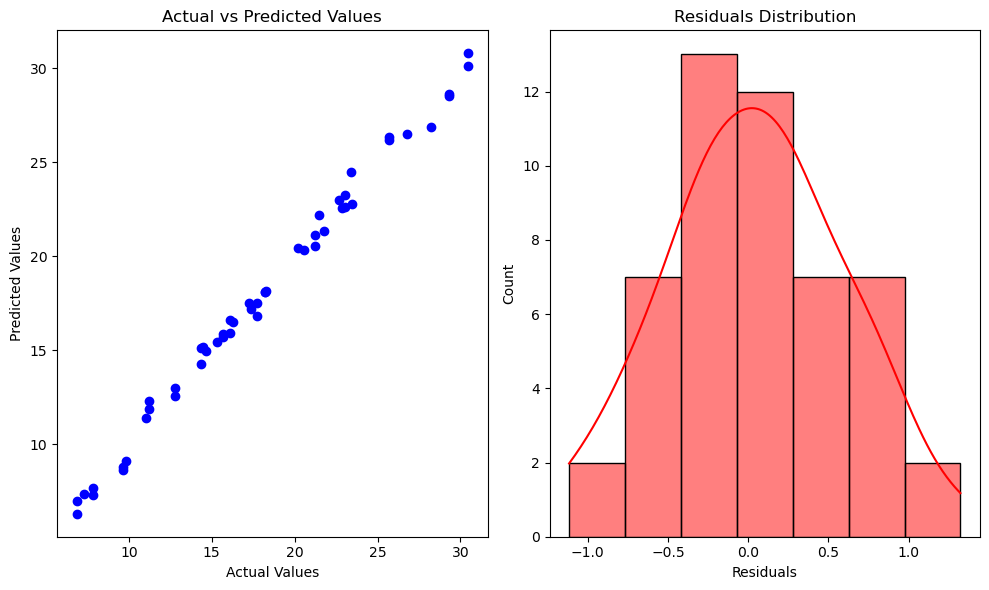

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('power_consumption_data.csv')

# Display first few rows and column names
print("First few rows of the dataset:")
print(data.head())
print("\nColumn names:")
print(data.columns)

# Data Preprocessing
# Fill missing values if any
data.fillna(method='ffill', inplace=True)

# Check for any remaining missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Convert categorical columns to numerical values
data['City'] = data['City'].astype('category').cat.codes
data['Street Address'] = data['Street Address'].astype('category').cat.codes

# Feature Engineering
# Define features and target variable
features = ['Power Consumption (kWh)', 'Unit Charge (per kWh)', 'City', 'Street Address', 'Meter Number', 'Old Balance ($)']
target = 'Total Amount to be Paid ($)'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"\nMean Squared Error: {mse}")

# Feature Importance
feature_importance = model.coef_
print("\nFeature Importances:")
for feature, importance in zip(features, feature_importance):
    print(f"Feature: {feature}, Importance: {importance}")

# Visualization
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Residual plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='red')
plt.xlabel('Residuals')
plt.title('Residuals Distribution')

plt.tight_layout()
plt.show()
